# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_city = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [58]:
cities

['kadykchan',
 'mataura',
 'korla',
 'east london',
 'belushya guba',
 'presque isle',
 'lompoc',
 'rikitea',
 'bredasdorp',
 'busselton',
 'puerto ayora',
 'linares',
 'itoman',
 'udachnyy',
 'mitsamiouli',
 'saldanha',
 'ust-kamchatsk',
 'opuwo',
 'conde',
 'albany',
 'codrington',
 'nanortalik',
 'kibondo',
 'stekolnyy',
 'swinoujscie',
 'ramhormoz',
 'ushuaia',
 'paita',
 'lagoa',
 'bonavista',
 'new norfolk',
 'basoko',
 'kahului',
 'constitucion',
 'hobart',
 'mus',
 'talnakh',
 'punta arenas',
 'gayny',
 'cape town',
 'barrow',
 'khatanga',
 'barentsburg',
 'mar del plata',
 'bandarbeyla',
 'severo-kurilsk',
 'houlung',
 'mayna',
 'pevek',
 'inongo',
 'kloulklubed',
 'namibe',
 'aromashevo',
 'mitu',
 'lumeje',
 'hilo',
 'vardo',
 'saskylakh',
 'tsogni',
 'lebu',
 'itarema',
 'arraial do cabo',
 'puerto del rosario',
 'vostok',
 'kalmanka',
 'broome',
 'guerrero negro',
 'ponta do sol',
 'teneguiban',
 'salalah',
 'jamestown',
 'port hueneme',
 'nuuk',
 'santiago',
 'yoichi',
 '

In [59]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bc074d25bd9fe9fd8fd9c5e7997e24eb&units=imperial&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:

# set up lists to hold reponse info
lat = []
lng = []
temp = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print(f"The Latitude information received is: {lat}")
        print(f"The Longitude information received is: {lng}")
        print(f"The Temperature information received is: {temp}")
        print(f"The Temperature information received is: {temp_max}")
        print(f"The Humidity information received is: {humidity}")
        print(f"The Cloudiness information received is: {cloudiness}")
        print(f"The Wind_speed information received is: {wind_speed}")
        
        pass

The Latitude information received is: []
The Longitude information received is: []
The Temperature information received is: []
The Temperature information received is: []
The Humidity information received is: []
The Cloudiness information received is: []
The Wind_speed information received is: []
The Latitude information received is: [-46.1927, 41.7597, -33.0153]
The Longitude information received is: [168.8643, 86.1469, 27.9116]
The Temperature information received is: [46.47, 81.01, 77.94]
The Temperature information received is: [46.47, 81.01, 77.94]
The Humidity information received is: [99, 13, 36]
The Cloudiness information received is: [99, 100, 0]
The Wind_speed information received is: [3.51, 2.57, 4.61]
The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117]
The Longitude information received is: [168.8643, 86.1469, 27.9116, -68.0159, -120.4579, -134.9692, 20.0403,

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833]
The Longitude information received is: [168.8643, 86.1469, 27.9116, -68.0159, -120.4579, -134.9692, 20.0403, 115.3333, -90.3518, -71.6, 127.6694, 112.4, 43.2844, 17.9442, 13.84, -34.9075, -73.9662, 141.9667, -45.2371, 30.7203, 14.2471, 49.6035, -68.3, -81.1144, -27.9833, -53.1147, 147.0587, 23.616, -156.47, -72.4167, 147.3294, 41.75, 

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136]
The Longitude information received is: [168.8643, 86.1469, 27.9116, -68.0159, -120.4579, -134.9692, 20.0403, 115.3333, -90.3518, -71.6, 127.6694, 112.4, 43.2844, 17.9442, 13.84, -34.9075, -

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931]
The Longitude information received is: [168.8643, 86.1469, 27.9116, -68.0159, -120.4579, -134.9692, 20.0403

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

The Latitude information received is: [-46.1927, 41.7597, -33.0153, 46.6811, 34.6391, -23.1203, -34.5322, -33.65, -0.7393, -35.85, 26.1247, 66.4167, -11.3847, -33.0117, -18.0607, -7.2597, 42.6001, -38.2667, 60.1432, -3.5864, 53.9105, 31.28, -54.8, -5.0892, 39.05, 48.6499, -42.7826, 1.2391, 20.8947, -35.3333, -42.8794, 39, 69.4865, -53.15, 60.3071, -33.9258, 71.2906, 71.9667, -38.0023, 9.4942, 50.6789, 54.1135, 69.7008, -1.95, 7.0419, -15.1961, 56.8602, 1.1983, -11.55, 19.7297, 70.3705, 71.9167, -2.7942, -37.6167, -2.9248, -22.9661, 28.5004, 46.4856, 52.8992, 42.2506, 27.9769, 32.6667, 17.0151, 42.097, 34.1478, 64.1835, -33.4569, 43.2039, 47.4667, 19.2833, -24.8667, 60.34, -9.8, -2.3167, -5.5569, -26.3667, 59.7035, 55.1001, 67.8006, -21.2078, -26.6481, -2.2717, 78.2186, 12.35, 14.3, 39.1834, -0.6136, -12.9319, -33.918, -27.0303, 65.9667, 3.0707, 3.6415, -19.0595, -20.4081, 20.931, 32.3502, -21.2, 55.7435, 57.79, -0.6, -33.5906, 14.5094, 40.1629, 5.5577, 34.855, -17, 71.6872, -24.7911, 3

In [61]:
# create a data frame for all the cities for their latitude, temperature, humidity, cloudiness and wind speed

city_data = {"City": cities,
            "Latitude": lat,
             "Longitude": lng,
             "Humidity": humidity,
            "Temperature": temp,
             "Temp Max" : temp_max,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed}

city_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in city_data.items() ])).dropna()
city_df 
# city_df.Latitude.describe


,City,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,kadykchan,-46.1927,168.8643,99.0,46.47,46.47,99.0,3.51
1,mataura,41.7597,86.1469,13.0,81.01,81.01,100.0,2.57
2,korla,-33.0153,27.9116,36.0,77.94,77.94,0.0,4.61
3,east london,46.6811,-68.0159,88.0,52.41,54.28,90.0,9.22
4,belushya guba,34.6391,-120.4579,82.0,60.96,73.78,1.0,3.44
...,...,...,...,...,...,...,...,...
583,berezna,34.6851,135.8049,96.0,70.52,72.64,100.0,5.59
584,yershov,33.0833,-16.3333,77.0,65.62,70.54,75.0,16.11
585,pasni,65.0083,53.9113,58.0,63.28,63.28,72.0,10.49
586,caibarien,16.1833,-22.9167,85.0,71.20,71.20,41.0,15.17


In [62]:
# export the data in .csv file to designated folder
city_df.to_csv("output_data/city-df.csv", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = city_df.loc[(city_df["Humidity"] < 100)]
city_humidity

,City,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,kadykchan,-46.1927,168.8643,99.0,46.47,46.47,99.0,3.51
1,mataura,41.7597,86.1469,13.0,81.01,81.01,100.0,2.57
2,korla,-33.0153,27.9116,36.0,77.94,77.94,0.0,4.61
3,east london,46.6811,-68.0159,88.0,52.41,54.28,90.0,9.22
4,belushya guba,34.6391,-120.4579,82.0,60.96,73.78,1.0,3.44
...,...,...,...,...,...,...,...,...
583,berezna,34.6851,135.8049,96.0,70.52,72.64,100.0,5.59
584,yershov,33.0833,-16.3333,77.0,65.62,70.54,75.0,16.11
585,pasni,65.0083,53.9113,58.0,63.28,63.28,72.0,10.49
586,caibarien,16.1833,-22.9167,85.0,71.20,71.20,41.0,15.17


In [64]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The r-value is: 0.004841865969450127


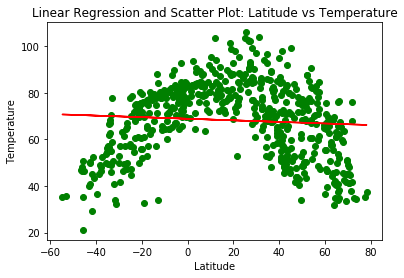

In [65]:
# create scatter plot for latitude vs temperatrure 
from datetime import date

# Create a Scatter Plot for temperature vs latitude
x_values = city_df["Latitude"]
y_values = city_df["Temperature"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
# plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Temperature")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs temp.png")

# Show plot
plt.show();


## Latitude vs. Humidity Plot

The r-value is: 0.03183078810238789


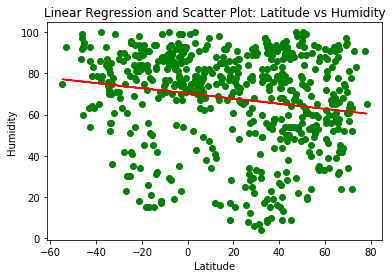

In [66]:
# create scatter plot for latitude vs humidity 
from datetime import date

# Create a Scatter Plot for temperature vs humidity
x_values = city_df["Latitude"]
y_values = city_df["Humidity"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on temperature vs. humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Humidity")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs humidity.png")

# Show plot
plt.show();

## Latitude vs. Cloudiness Plot

The r-value is: 0.0012115496347810946


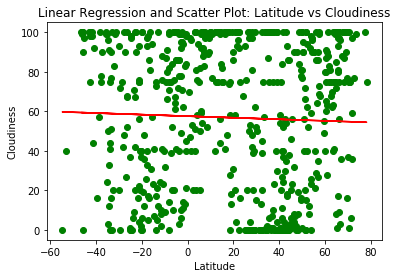

In [67]:
# create scatter plot for latitude vs Cloudiness
from datetime import date

# Create a Scatter Plot for temperature vs cloudiness
x_values = city_df["Latitude"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on temperature vs. cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Cloudiness")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs cloudiness.png")

# Show plot
plt.show();

## Latitude vs. Wind Speed Plot

The r-value is: 0.018354938591259456


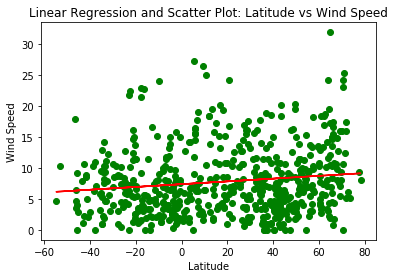

In [68]:
# create scatter plot for latitude vs wind speed
from datetime import date

# Create a Scatter Plot for temperature vs wind speed
x_values = city_df["Latitude"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on temperature vs. wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Wind Speed")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs wind speed.png")
# Show plot
plt.show();

## Linear Regression

In [69]:
# generating northern hemisphere data frame

nth_hemi =  city_df.loc[(city_df['Latitude'] >= 0)]
nth_hemi

,City,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
1,mataura,41.7597,86.1469,13.0,81.01,81.01,100.0,2.57
3,east london,46.6811,-68.0159,88.0,52.41,54.28,90.0,9.22
4,belushya guba,34.6391,-120.4579,82.0,60.96,73.78,1.0,3.44
10,puerto ayora,26.1247,127.6694,89.0,84.22,86.40,20.0,12.66
11,linares,66.4167,112.4000,43.0,67.30,67.30,96.0,1.77
...,...,...,...,...,...,...,...,...
583,berezna,34.6851,135.8049,96.0,70.52,72.64,100.0,5.59
584,yershov,33.0833,-16.3333,77.0,65.62,70.54,75.0,16.11
585,pasni,65.0083,53.9113,58.0,63.28,63.28,72.0,10.49
586,caibarien,16.1833,-22.9167,85.0,71.20,71.20,41.0,15.17


In [70]:
# generating southern hemisphere data frame

sth_hemi =  city_df.loc[(city_df['Latitude'] <= 0)]
sth_hemi

,City,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,kadykchan,-46.1927,168.8643,99.0,46.47,46.47,99.0,3.51
2,korla,-33.0153,27.9116,36.0,77.94,77.94,0.0,4.61
5,presque isle,-23.1203,-134.9692,78.0,74.84,74.84,100.0,21.70
6,lompoc,-34.5322,20.0403,72.0,61.92,66.27,33.0,2.30
7,rikitea,-33.6500,115.3333,85.0,55.09,55.09,16.0,9.31
...,...,...,...,...,...,...,...,...
564,meulaboh,-9.8607,124.2840,75.0,64.44,64.44,9.0,2.46
569,ketchikan,-21.3758,-46.5256,89.0,49.73,49.73,4.0,1.34
572,terrasini,-10.6167,150.6667,86.0,79.75,79.75,23.0,15.23
579,washington,-26.5020,17.1583,30.0,67.10,67.10,67.0,10.18


####  Northern Hemisphere -  Max Temprature vs. Latitude Linear Regression

The r-value is: 0.40925446974779783


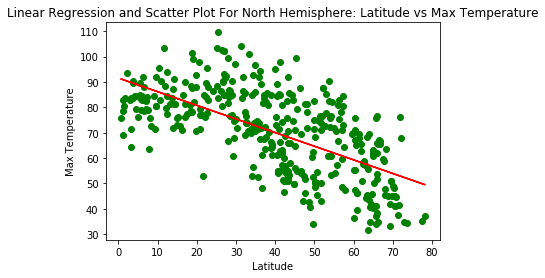

In [71]:
# create scatter plot for latitude vs Max Temperature
from datetime import date

# Create a Scatter Plot for latitude vs Max Temperature
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Temp Max"]
plt.scatter(x_values,y_values,color="green")
# plt.xlabel("Latitude")
# plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on latitude vs. Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Max Temperature")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs temp speed.png")
# Show plot
plt.show();

####  Southern Hemisphere -  Max Temprature vs. Latitude Linear Regression

The r-value is: 0.5666362947521175


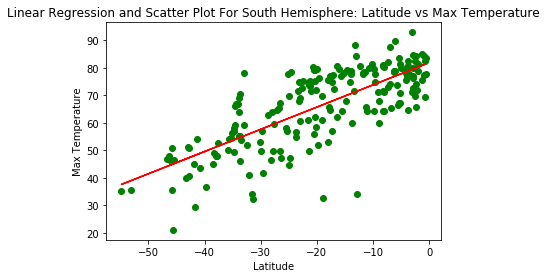

In [72]:
# create scatter plot for latitude vs Max Temperature
from datetime import date

# Create a Scatter Plot for latitude vs Max Temperature
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Temp Max"]
plt.scatter(x_values,y_values,color="green")
# plt.xlabel("Latitude")
# plt.ylabel("Temperature")
# plt.show()

# Perform a linear regression on latitude vs. Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Max Temperature")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs temp.png")
# Show plot
plt.show();

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006199634934123119


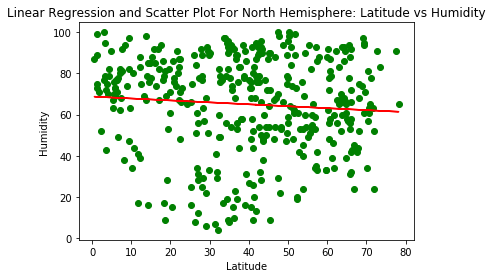

In [73]:
# create scatter plot for latitude vs Humidity
from datetime import date

# Create a Scatter Plot for latitude vs Humidity
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Humidity"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on latitude vs. Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Humidity")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs humidity.png")
# Show plot
plt.show();

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0014872763564470414


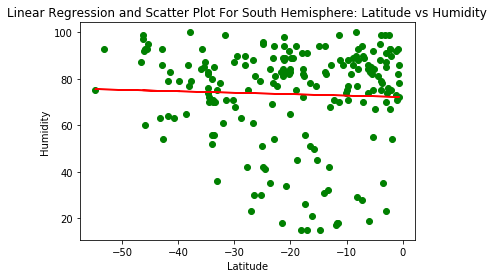

In [74]:
# create scatter plot for latitude vs Humidity
from datetime import date

# Create a Scatter Plot for latitude vs Humidity
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Humidity"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on latitude vs. Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Humidity")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs humidity.png")
# Show plot
plt.show();

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0032213698043719228


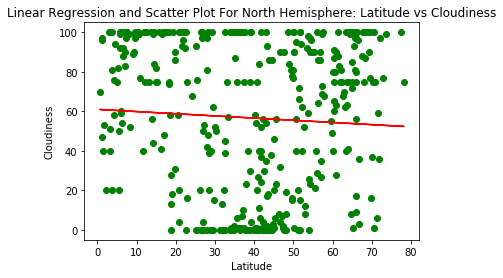

In [75]:
# create scatter plot for latitude vs Cloudiness
from datetime import date

# Create a Scatter Plot for latitude vs Cloudiness
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Cloudiness"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.show()

# Perform a linear regression on latitude vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Cloudiness")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs cloudiness.png")
# Show plot
plt.show();

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0041488622829007156


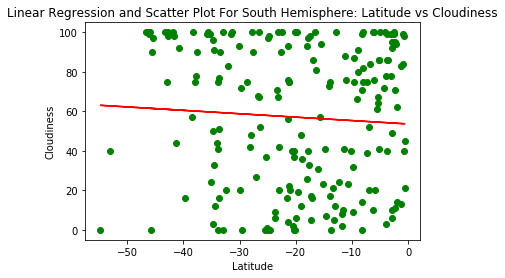

In [76]:
# create scatter plot for latitude vs Cloudiness
from datetime import date

# Create a Scatter Plot for latitude vs Cloudiness
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Cloudiness"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.show()

# Perform a linear regression on latitude vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Cloudiness")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs cloudiness.png")
# Show plot
plt.show();

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004858701959318384


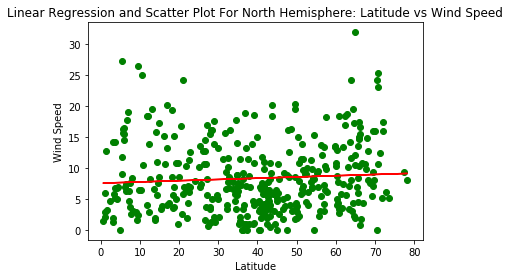

In [77]:
# create scatter plot for latitude vs Wind Speed
from datetime import date

# Create a Scatter Plot for latitude vs Wind Speed
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Wind Speed"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# plt.show()

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Wind Speed")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs wind speed.png")
# Show plot
plt.show();

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0013085942798767402


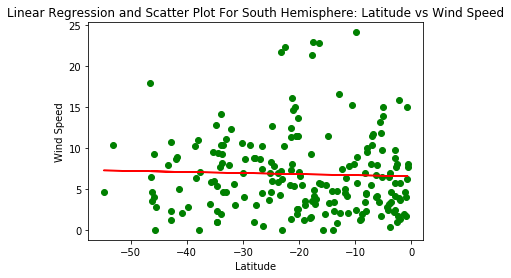

In [78]:
# create scatter plot for latitude vs Wind Speed
from datetime import date

# Create a Scatter Plot for latitude vs Wind Speed
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Wind Speed"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# plt.show()

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Wind Speed")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs wind speed.png")
# Show plot
plt.show();